Joanne Lin
December 2017


# Where does it pay to go to college?


### Abstract:
The student loan debt landscape is pretty grim. In the US, Americans owe 1.45 trillion dollars in student loans, spread over 44.2 million borrowers ([source](https://blogs.wsj.com/economics/2016/05/02/student-debt-is-about-to-set-another-record-but-the-picture-isnt-all-bad/)). The average graduate in 2016 has over $37,000 in loans to pay off ([source](https://blogs.wsj.com/economics/2016/05/02/student-debt-is-about-to-set-another-record-but-the-picture-isnt-all-bad/)). More than ever, students and their families must consider earning potential post-graduation when deciding where to attend college.  

The following project examines the starting and mid-career salaries of 5 different school types:  Engineering, Ivy League, Liberal Arts, Party and State schools. I found that Ivy League schools have higher median starting and mid-career salaries with less variation, making these eight universities the safest bet in terms of earning potential. Engineering schools have the biggest range for starting median salary, indicating that where engineering students attend college matters when it comes to the first jobs out of college. The mean median salaries for Liberal Arts, Party and State schools are lower than that of Engineering and Ivy Leagues. With the most data points in the dataset, State schools have the biggest range of median mid-career salaries and the most outliers; "Good" State schools have median salaries similar to that of Ivy Leagues, while "bad" State schools fare worse than Party schools.

I also ran ANOVA significance tests to compare the differences in mean median salaries for the school types. While the differences in mean median salaries for both starting and mid-career were statistically significant between Liberal Arts, Party and State (p < 0.001), differences in median salaries between just Liberal Arts and Party school were not (p = .98 and p = .12 for starting and mid-career, respectively). This means that the median salaries of Liberal Arts schools is no better or worse than that of Party schools. Interestingly, the difference in salaries of Engineering and Ivy League schools start off as not significantly different for starting median salaries (p = 0.63), but become significant when we look at mid-career salaries (p = 0.0064). This suggests that, in the long run, it still pays to go to an Ivy League school.  

## Setting up the data frames

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
%matplotlib inline

#### Data Source

I downloaded this dataset frm kaggle.com ([source](https://www.kaggle.com/wsj/college-salaries)).  It was originally aggregated by the Wall Street Journal from Payscale, Inc.   "Mid-Career" is defined as 10 years post-commencement. 

In [2]:
# Loading files
college = pd.read_csv('capstone-data/salaries-by-college-type.csv')

# Renaming columns
college.columns = ['school_name', 'school_type','starting_median_salary', 'midcareer_median_salary', 'midcareer_p10', 'midcareer_p25', 'midcareer_p75', 'midcareer_p90']
college.head()

,school_name,school_type,starting_median_salary,midcareer_median_salary,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
0,Massachusetts Institute of Technology (MIT),Engineering,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00"
1,California Institute of Technology (CIT),Engineering,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN
2,Harvey Mudd College,Engineering,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00"
4,Cooper Union,Engineering,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN


In [3]:
#Changing strings to ints for analysis

dollar_cols = ['starting_median_salary', 'midcareer_median_salary', 'midcareer_p10', 'midcareer_p25', 'midcareer_p75', 'midcareer_p90']

# For column that has data stored as a string instead of a number, remove '$', the comma, and convert it to a number.
for x in dollar_cols:
    college[x] = college[x].str.replace("$","")
    college[x] = college[x].str.replace(",","")
    college[x] = pd.to_numeric(college[x])

college.head()

,school_name,school_type,starting_median_salary,midcareer_median_salary,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
0,Massachusetts Institute of Technology (MIT),Engineering,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0
1,California Institute of Technology (CIT),Engineering,75500.0,123000.0,NaN,104000.0,161000.0,NaN
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN


#### Dealing with Duplicates

University of California, Santa Barbara is a state school and a party school.  MIT is a state school and an Engineering school.  How does the dataset handle universities that fit under multiple school types?

In [4]:
names = list(college['school_name'])

# This code pulls the school names that have duplicates.
# Code adapted from this Stack Overflow question: 
#      https://stackoverflow.com/questions/11236006/identify-duplicate-values-in-a-list-in-python
duplicates = [names[i] for i in range(len(names)) if not i == names.index(names[i])]
    
# for loop that prints columns for school names with duplicates
for d in duplicates:
    print(college[college['school_name'] == str(d)])
    

               school_name   school_type  starting_median_salary  \
31  Randolph-Macon College         Party                 42600.0   
67  Randolph-Macon College  Liberal Arts                 42600.0   

    midcareer_median_salary  midcareer_p10  midcareer_p25  midcareer_p75  \
31                  83600.0            NaN        54100.0       123000.0   
67                  83600.0            NaN        54100.0       123000.0   

    midcareer_p90  
31            NaN  
67            NaN  
                                           school_name school_type  \
19   University of Illinois at Urbana-Champaign (UIUC)       Party   
102  University of Illinois at Urbana-Champaign (UIUC)       State   

     starting_median_salary  midcareer_median_salary  midcareer_p10  \
19                  52900.0                  96100.0        48200.0   
102                 52900.0                  96100.0        48200.0   

     midcareer_p25  midcareer_p75  midcareer_p90  
19         68900.0       13200

It looks like all Party schools are listed twice; once under Party school and once under their more official designation.  We should remove the duplicates, keeping the row that has the university categorized as a Party School.

In [5]:
# Since Party schools are listed first in the dataset, we want to keep the first instance of the duplication.
college = college.drop_duplicates(['school_name'], keep = 'first')

#Checking to see that the duplicates are removed.
names = list(college['school_name'])
[names[i] for i in range(len(names)) if not i == names.index(names[i])]

[]

Success!

## Describing the dataset

This dataset contains 269 schools grouped into 5 different categories: Engineering, Ivy League, Liberal Arts, Party and State.  For each school, we have the starting and mid-career median salaries of their graduates.  The dataset also includes information on the schools' mid-career salaries for the 10th, 25th, 75th and 90th percentiles. Because the percentile information is incomplete, I will not be using this data for analysis.

The summary statistics above show that we have data on a lot more state schools (175) compared to the other types of schools.  Ivy League schools have a small n at 8, which will limit significance testing that assumes normality.  From the summary statistics table by school type, we   see that Ivy League and Engineering schools have higher mean starting and mid-career salaries compared to the other types.  We would need to run statistical tests to determine if these differences are significant.

In [6]:
# Summary statistics of college dataset
college.describe().round(0)

,starting_median_salary,midcareer_median_salary,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
count,249.0,249.0,212.0,249.0,249.0,212.0
mean,46097.0,83872.0,44268.0,60403.0,116129.0,156877.0
std,6587.0,14766.0,9026.0,11723.0,23725.0,35936.0
min,34800.0,43900.0,22600.0,31800.0,60900.0,87600.0
25%,42000.0,73400.0,38700.0,53000.0,99900.0,133750.0
50%,44800.0,81500.0,43000.0,58400.0,112000.0,151000.0
75%,48300.0,92800.0,47500.0,65100.0,128000.0,169250.0
max,75500.0,134000.0,80000.0,104000.0,234000.0,326000.0


Note:  I was unable to convert numbers into integers.

In [7]:
# Summary statistics by type of school
college.groupby('school_type').describe().round(2)

midcareer_median_salary                                           \
                               count       mean       std       min       25%   
school_type                                                                     
Engineering                     19.0  103842.11  13840.73   80000.0   94400.0   
Ivy League                       8.0  120125.00  10412.05  107000.0  109750.0   
Liberal Arts                    46.0   89504.35  12423.81   63900.0   80725.0   
Party                           20.0   84685.00   7237.57   73000.0   79350.0   
State                          156.0   77815.38  10360.88   43900.0   71400.0   

                                           midcareer_p10             ...     \
                   50%       75%       max         count      mean   ...      
school_type                                                          ...      
Engineering   106000.0  114000.0  126000.0          15.0  61793.33   ...      
Ivy League    122000.0  127250.0  134000.0           8.0  57900.00   ...      
Liberal Arts   86000.0  101750.0  110000.0          14.0  47478.57   ...      
Party          84050.0   88975.0   96100.0          19.0  44052.63   ...      
State          77800.0   84125.0  112000.0         156.0  41622.44   ...      

             midcareer_p90           starting_median_salary            \
                       75%       max                  count      mean   
school_type                                                             
Engineering       187500.0  220000.0                   19.0  59057.89   
Ivy League        296250.0  326000.0                    8.0  60475.00   
Liberal Arts      214000.0  265000.0                   46.0  45815.22   
Party             175000.0  209000.0                   20.0  45715.00   
State             158000.0  215000.0                  156.0  43912.82   

                                                                    
                  std      min      25%      50%      75%      max  
school_type                                                         
Engineering   7842.92  46200.0  53250.0  58300.0  62000.0  75500.0  
Ivy League    3218.58  56200.0  58825.0  59850.0  61525.0  66500.0  
Liberal Arts  4391.61  38500.0  42175.0  45750.0  48600.0  54500.0  
Party         3685.72  41300.0  42500.0  44600.0  47975.0  52900.0  
State         4293.86  34800.0  41175.0  43350.0  46125.0  59900.0  

[5 rows x 48 columns]

#### What are the top and bottom 5 state schools in terms of starting and mid-career salaries?

With 156 State school listed in this dataset, it is helpful to look at the range of starting and median salaries we are dealing with. The following two tables generate the top and bottom five state schools in terms of starting and midcareer salaries. University of California, Berkeley sits at the top with a starting median salary of \$59,900 and a mid-career salary of \$112,000. This is comparable to the median salaries for Ivy Leagues. Columbia University, for example, has a starting median salary of \$59,400 and a mid-career salary of \$107,000.  

On the other hand, the bottom 5 state schools have lower starting and midcareer salaries than the respective mean median salaries of party schools.  A graduate from UC Berkeley can expect to make over 2.5 times more than a graduate from Black Hills University by mid-career.

For future analysis, it may be helpful to split state schools into sub-categories, for example, UCs, Cal States, or CUNYs.  Further disaggregation of the State school type would help us make more effective comparisons and draw insightful conclusions on where it pays to go to college. 

In [8]:
college[college['school_type'] == 'State'].sort_values(['midcareer_median_salary','starting_median_salary'], ascending=False).head(5)

,school_name,school_type,starting_median_salary,midcareer_median_salary,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
94,"University of California, Berkeley",State,59900.0,112000.0,59500.0,81000.0,149000.0,201000.0
95,University of Virginia (UVA),State,52700.0,103000.0,52200.0,71800.0,146000.0,215000.0
96,Cal Poly San Luis Obispo,State,57200.0,101000.0,55000.0,74700.0,133000.0,178000.0
97,University of California at Los Angeles (UCLA),State,52600.0,101000.0,51300.0,72500.0,139000.0,193000.0
98,"University of California, San Diego (UCSD)",State,51100.0,101000.0,51700.0,75400.0,131000.0,177000.0


In [9]:
college[college['school_type'] == 'State'].sort_values(['midcareer_median_salary','starting_median_salary'], ascending=True).head(5)

,school_name,school_type,starting_median_salary,midcareer_median_salary,midcareer_p10,midcareer_p25,midcareer_p75,midcareer_p90
268,Black Hills State University,State,35300.0,43900.0,27000.0,32200.0,60900.0,87600.0
267,Montana State University - Billings,State,37900.0,50600.0,22600.0,31800.0,78500.0,98900.0
266,Southern Utah University,State,41900.0,56500.0,30700.0,39700.0,78400.0,116000.0
265,Pittsburg State University,State,40400.0,58200.0,25600.0,46000.0,84600.0,117000.0
264,Austin Peay State University,State,37700.0,59200.0,32200.0,40500.0,73900.0,96200.0


As UC Berkeley is my alma mater, Go Bears. ʕ•ᴥ•ʔ 

## Analysis

#### What can graduates of each school type reasonably expect in terms of starting and mid-career salaries?
In the following sections, I will be utilizing histograms and boxplots to visualize the distribution of salaries of each school type.  These visualizations will help us compare the starting and mid-career median salaries between school types.  


#### Histograms
The historgrams below show the distribution of starting median salaries of each school type, compared to the mid-career median salaries of each school type.  Since the State School variable has a larger n, the histograms have been normalized to make it easier to see the differences in distributions between school types.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


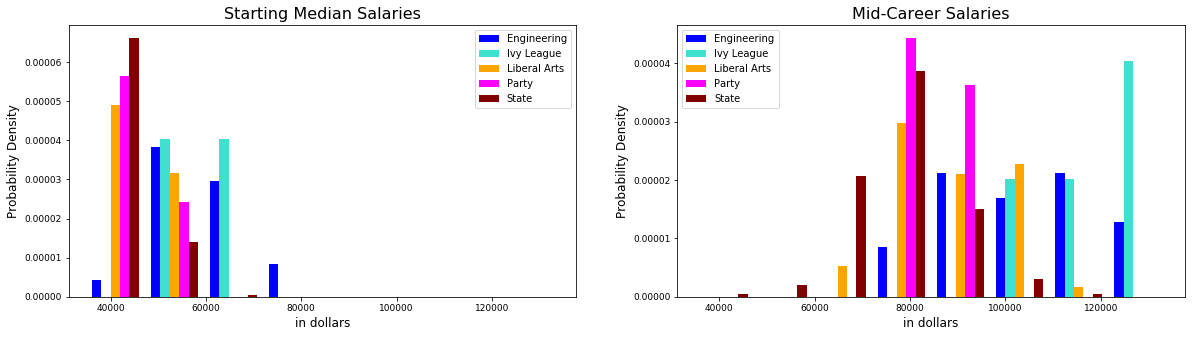

In [10]:
# Creating separate variables for relevant data arrays allows a for loop to iterate through each variable
#    to generate the histograms below.

Eng = college[college['school_type'] == "Engineering"]['starting_median_salary']
Ivy = college[college['school_type'] == "Ivy League"]['starting_median_salary']
LibArts = college[college['school_type'] == "Liberal Arts"]['starting_median_salary']
Party = college[college['school_type'] == "Party"]['starting_median_salary']
State = college[college['school_type'] == "State"]['starting_median_salary']
start_med = [Eng, Ivy, LibArts, Party, State]

Eng2 = college[college['school_type'] == "Engineering"]['midcareer_median_salary']
Ivy2 = college[college['school_type'] == "Ivy League"]['midcareer_median_salary']
LibArts2 = college[college['school_type'] == "Liberal Arts"]['midcareer_median_salary']
Party2 = college[college['school_type'] == "Party"]['midcareer_median_salary']
State2 = college[college['school_type'] == "State"]['midcareer_median_salary']
mid_career = [Eng2, Ivy2, LibArts2, Party2, State2]

# The code below generates histograms for starting and mid-career salaries by type of school

# Using Sturges' formula to determine number of bins
n_bins = int(math.log2(len(college)) + 1)

colors = ['blue','turquoise', 'orange', 'magenta','maroon']
labels = ['Engineering','Ivy League','Liberal Arts','Party','State']

# Setting the same range for both starting and mid-career histograms to better see change of median 
#     salaries over time.
xrange = (min(college.starting_median_salary), max(college.midcareer_median_salary)) 

s = [start_med, mid_career]
t = ['Starting Median Salaries', 'Mid-Career Salaries']

plt.figure(figsize=(20,5))

# This for loop literates over the two variables (start_med and mid_med) in s that contain
#    data arrays for each school type and the median salaries and arranges them in a subplot.

for i in range(0,len(s)):
    plt.subplot(1, 2, i+1)
    
    plt.hist(s[i], n_bins, xrange, histtype='bar', normed=True, color = colors, label=labels)
    plt.title(t[i], fontsize=16)
    plt.xlabel("in dollars", fontsize=12)  
    plt.ylabel("Probability Density", fontsize=12)
    plt.xticks(fontsize=9)  
    plt.yticks(fontsize=9)
    plt.legend(prop={'size':10})

    i += 1

The histograms of the starting median salaries for each school type are clustered together, with the exception of Engineering schools.  Liberal Arts, Party and State schools have starting median salaries that cluster between \$35,000 and \$55,000. Ivy league schools have notably higher starting median salaries than most other types of schools, clustering between \$58,000 and \$70,000.  This suggests that graduates from all school types have starting salaries similar to that of their peers in similar school types. Engineering schools, on the other hand, have the most variation, indicating that which engineering school attended matters when looking at starting median salaries. We will explore the differences in median salaries later using significance testing. 

Considering mid-career salaries, all school types have a wider range of salaries with the exception of Ivy Leagues.  Liberal Arts, Party and State schools have salaries between \$70,000 and \$105,000. This suggests that graduates from these three types of school have similar earning potential by mid career.  Engineering schools also have a broader range compared to its starting median salary, from \$75,000 to \$110,000.  Interestingly, the distribution of Ivy League mid-career salaries remains small, ranging from about \$110,000 to \$118,000. This indicates that graduates of the Ivy League system can reasonably expect a higher starting and mid-career salary, regardless of which school within the Ivy League system they attend, a finding that aligns with the public's perception of Ivy League status.

#### Boxplots
The following visualizations utilize boxplots to provide an alternative view of the data.  With boxplots, we can compare the mean median salaries across school types, and easily see the distribution of the data as defined by the quartiles.  The box in the boxplot show the interquartile range, where 50% of the data around the mean resides. The points outside the whiskers signify the outliers.

Note: I discussed the deprecation warning with my mentor, and he said not to worry about it for this project.  I was also unable to make subplot boxplots, because generating subplots uses matplotlib while creating boxplots uses pandas.

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


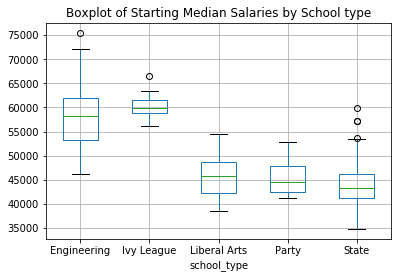

In [11]:
# Boxplots of starting median salaries by type of college.

college.boxplot('starting_median_salary',by='school_type')
plt.title("Boxplot of Starting Median Salaries by School type")
# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


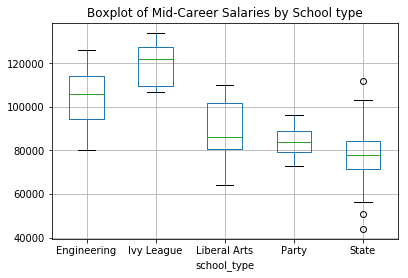

In [12]:
#Boxplots of mid-career salaries by type of college

college.boxplot('midcareer_median_salary',by='school_type')
plt.title("Boxplot of Mid-Career Salaries by School type")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


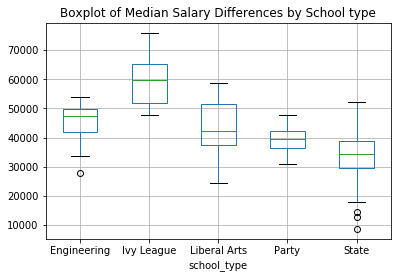

In [13]:
#Boxplot of the difference between starting median salaries and mid-career salaries for each college type

college['median_salary_difference'] = college['midcareer_median_salary'] - college['starting_median_salary']

college.boxplot('median_salary_difference', by='school_type')
plt.title("Boxplot of Median Salary Differences by School type")

# get rid of the automatic 'Boxplot grouped by group_by_column_name' title
plt.suptitle("")

plt.show()

The boxplots show definitively that Engineering schools have the most range with starting median salaries, implying that where an engineering student goes to school matters more than the other types of colleges when looking at earning potential right after graduation.  Ivy Leagues have less variation in terms of starting salaries and the highest mean starting median salary. Where a student goes within the Ivy League system matters less when looking at starting median salaries, and graduates can reasonably expect to make more than graduates from other school types. Liberal Arts, Party and State schools have similar mean median starting salaries, with more variation in State schools.  State schools have a larger dataset compared to the other types. This may account for the variation.

The mid-career boxplots show that, similar to the starting median salaries, Liberal Arts, State and Party schools have similar mean median salaries.  It is interesting to note that Ivy League mid-career salaries has pulled ahead of Engineering mid-career salaries, such that all eight mid-career salaries from Ivy League schools are higher than 50% of Engineering mid-career salaries.  

The last boxpot examines the difference between mid-career salaries and starting salaries for each school type.  Not surprisingly, Ivy Leagues come on top again, with the highest mean difference in salaries.  This means that not only do Ivy League graduates have higher salaries to start with, they also experience higher increases in their salaries by mid-career.  Party schools have the second lowest mean and the least variation, suggesting that graduates from party schools experience limited growth in salaries.  State school, again, have the most variation.  



### Significance testing
To further explore the differences in median salaries between school types, we can conduct one-way ANOVA tests. These tests would determine if the mean differences in median salaries are statistically significant.

#### Are the data for each school type normal?
An important assumption of the ANOVA test is that the data is normally distributed.  To check for normality, we can generate QQ plots. QQ plots are used to visually inspect whether or not the data is normal by graphing a variable with an unknown distribution against a variable with a known distribution.  If the resulting points fall into a straight line running from the lower left-hand corner to the upper right-hand corner of the plot (as indicated by the trend lines), the data is normal. Deviations from the trend line indicate that the data is not normal.

In [14]:
# The following function generates qqplots for each school type

# The attribute for this function is the column that contains the data we would like to test.
def qqplot(column):
    
    plt.figure(figsize=(20,5))
    types = ['Engineering','Ivy League','Liberal Arts','Party','State']

    # Generates a qqplot for each type
    for i in range(0,len(types)):  
        
        # Each school type's qqplot is placed in the subplot
        plt.subplot(1, len(types), i+1)

        t = types[i]

        x = college[college['school_type'] == t][column].sort_values()
        
        # Including seed for reproducibility
        np.random.seed(2119)
        
        norm = np.random.normal(0,1,len(x))
        norm.sort()

        # Colors of points are randonly generated for each school type.
        plt.plot(norm, x, "o", c=np.random.rand(3))
        plt.title(t)

        #generate a trend line as in http://widu.tumblr.com/post/43624347354/matplotlib-trendline
        z = np.polyfit(norm,x, 1)
        p = np.poly1d(z)
        plt.plot(norm,p(norm),"k--", linewidth=1)
        
        plt.xlabel("Theoretical quantiles")
        plt.ylabel("Experimental quantiles")
        plt.tick_params()

        i = i + 1 

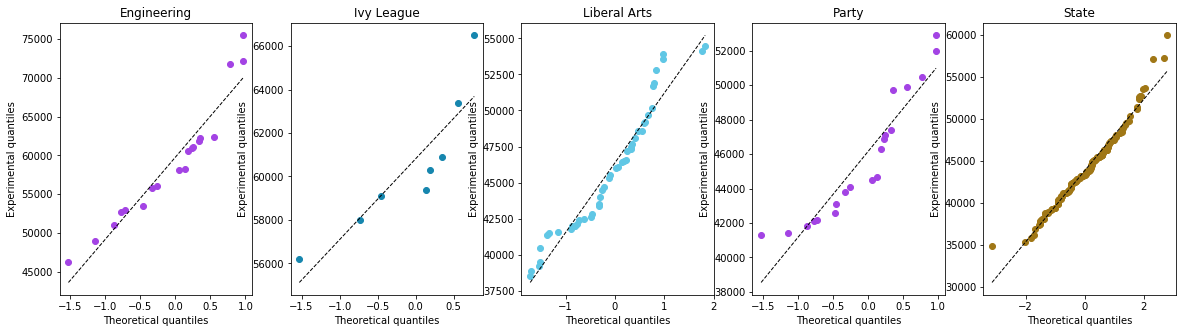

In [15]:
qqplot('starting_median_salary')

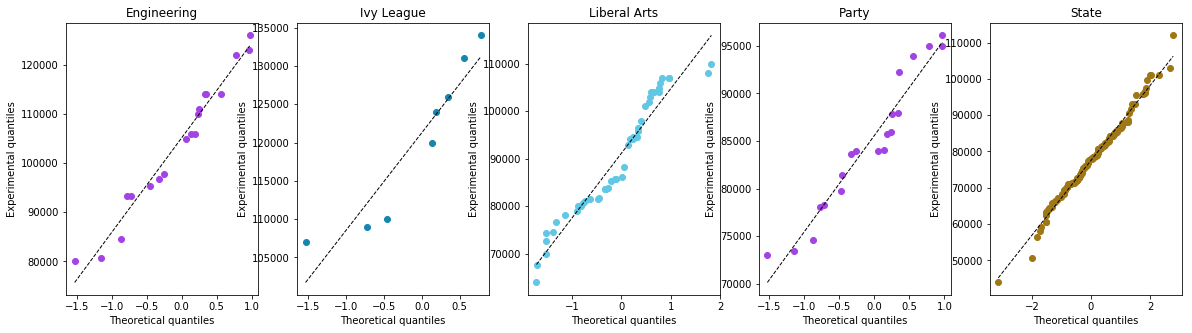

In [16]:
qqplot('midcareer_median_salary')

The QQ plots above show left skews for Liberal Arts and Party schools, as the points do not fall in straight lines.  This means that the majority of the data for Liberal Arts and Party schools is concentrated above the mean with a long tail extending to left.  The points for the state school fall on an almost perfectly straight line, indicating that the distribution is normal.

While ANOVA requires variables to be normally distributed, it is robust to modest violations of normality.  So for the purposes of this analysis, I will move forward with the ANOVA tests.

In [17]:
# Setting up for running ANOVA tests

grps = ['Engineering','Ivy League','Liberal Arts', 'Party', 'State']
sm_data = {grp:college['starting_median_salary'][college.school_type == grp] for grp in grps}
mc_data = {grp:college['midcareer_median_salary'][college.school_type == grp] for grp in grps}
k = len(pd.unique(college.school_type))
N = len(college.values)
n = college.groupby('school_type').size()[0]

#### Is the mean median starting and mid-career salaries significantly different between Liberal Arts, Party and State schools?

In [18]:
# First we should remove the outliers for the State Schools, as outliers could skew the mean calculations.
# Outliers in this case are points that go beyond 1.5x the IQR away from the top and bottom of the boxplot.

state = college[college['school_type'] == 'State']
state_sm = state[np.abs(state.starting_median_salary-state.starting_median_salary.mean()) < (1.5*state.starting_median_salary.std())]
state_mc = state[np.abs(state.midcareer_median_salary-state.midcareer_median_salary.mean()) < (1.5*state.midcareer_median_salary.std())]

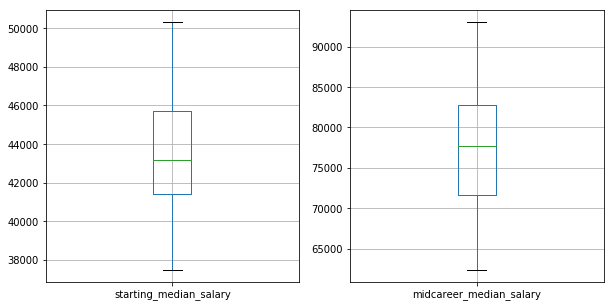

In [19]:
# Check boxplots that outliers have been removed

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
state_sm.boxplot('starting_median_salary')

plt.subplot(1,2,2)
state_mc.boxplot('midcareer_median_salary')

plt.show()

In [20]:
# Let's start by comparing the starting median salaries of Liberal Arts, Party, and State schools.
f, p = stats.f_oneway(sm_data['Liberal Arts'], sm_data['Party'], state_sm['starting_median_salary'])

print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

F-Statistic is  10.33
p-value is  0.0001


The F-Statistic of 10.33 and a p-value of 0.0001 indicate that, if the the starting median salaries of these three schools are the same, we would expect to obtain the observed difference or more extreme in 0.04% of the studies due to sampling error.  We have enough evidence to reject the null hypothesis and assume that these three types of schools have significantly different starting median salaries.

In [21]:
# Looking at mid-career salaries between Liberal Arts, Party and State
f, p = stats.f_oneway(mc_data['Liberal Arts'], mc_data['Party'], state_mc['midcareer_median_salary'])

print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

F-Statistic is  38.41
p-value is  0.0


The F-Statistic of 38.41 and a p-value of 0.0 indicates we can reject the null hypothesis and assume that these three types of schools have significantly different mid-career median salaries.

#### Is the mean median starting and mid-career salaries significantly different between Liberal Arts and Party?

State school have a lot of variation, which may affect the mean.  What if we just compare Party and Liberal Arts schools?

In [22]:
f, p = stats.f_oneway(sm_data['Liberal Arts'], sm_data['Party'])

print('Starting Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))
print('\n')

f, p = stats.f_oneway(mc_data['Liberal Arts'], mc_data['Party'])

print('Mid-Career Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

Starting Median Salary:
F-Statistic is  0.01
p-value is  0.9292


Mid-Career Median Salary:
F-Statistic is  2.61
p-value is  0.1112


When comparing the mean median salaries of Liberal Arts and Party schools, there is not enough evidence to show a statistically significant difference in in both starting and mid-career mean median salaries.  

#### Is the mean median starting and mid-career salaries significantly different between Engineering and Ivy League schools?

In [23]:
# Now let's compare the starting median salaries and mid-career salaries for engineering and Ivy League schools.
f, p = stats.f_oneway(sm_data['Engineering'], sm_data['Ivy League'])

print('Starting Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))
print('\n')

f, p = stats.f_oneway(mc_data['Engineering'], mc_data['Ivy League'])
print('Mid-Career Median Salary:')
print('F-Statistic is ', f.round(2)) 
print('p-value is ', p.round(4))

Starting Median Salary:
F-Statistic is  0.24
p-value is  0.6288


Mid-Career Median Salary:
F-Statistic is  8.87
p-value is  0.0064


Interestingly, the difference in mean median salaries of Engineering and Ivy League schools start off as not significantly different (p-value = 0.6288), but become significant when we look at mid-career salaries (p-value = 0.0064).  This suggests that, in the long run, it still pays to go to an Ivy League school.  

## Conclusion

So where does it pay to go to college?  According to this dataset, Ivy league graduates generally make money money right out of college and 10 years after graduation compared to graduates from other school types.  Plus, there is less variation within the Ivy League system in terms of median salaries, so where a student goes within the Ivy League system does not seem to matter.  This is in contrast to Engineering schools, where the school attended matters in terms of starting and mid-career median salaries.  Looking at the distribution of median salaries, students from a "good" engineering school can make as much mid-career as an Ivy League student. Students from a "bad" engineering school may do just as well as a student from a Party, Liberal Arts, or State school.

There is more variation in median salaries for state schools, including more outliers.  This indicates that the state school attended by the student matters when looking at starting and mid-career salaries.  When comparing mean median salaries for state, liberal arts and party schools, the difference is statistically significant.  Mean median salaries of liberal arts and party schools, on the other hand, are not statistically significant.  This suggests that students from party schools have similar salaries to students in liberal arts schools.

If we compare Engineering and Ivy League schools, the difference in mean median salaries start out as insignificant, but becomes significant ten years post-graduation with Ivy League salaries pulling ahead.  

### Limitations

There are limitations to this analysis.  For one, the dataset only includes the median salaries of each school's graduates.  We do not have information on the salary distribution within the school.  Ivy League schools also have a small n of eight, as there are eight Ivy League schools in the system.  Because of the small n, it is difficult to determine normality.  This is a limitation that cannot be removed.

We are also not considering other factors that may impact salary, such as the student's major or whether the student went to grad school before hitting mid-career.  It is also worth noting that this analysis does not consider the aspects of the student.  A typical Ivy League student, for example, is going to look different than a typical Party school student.  Because the selection of the student into a university is not random, we cannot assume that going to the "right" school is the only determining factor in the students' future earnings.

## Further Research

The current analysis does not consider the cost of tuition and student loans.  Ivy leagues, for example, have higher sticker prices than state schools.  How long does it take a student of each type school to earn back the cost of tuition?  If we consider the median student loan amounts, how would the conclusions change? Would it still pay to go to an Ivy League school? Analysis into tuition and student loans would require gathering more data through APIs and/or web-scraping.

It would also be interesting to incorporate other student aspects that may affect earning potential.  Where did the student go to high school?  What was his high school and college GPA?  What was her major?  Did his parents attend college? Is the college's region correlated with median salaries?  We could apply linear regression models to determine what factors result in the highest starting and mid-career salaries. 